# Steps to Tackle a Time Series Problem (with Codes in Python)
Note: These are just the codes from article

## Loading and Handling TS in Pandas

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [1]:
data = pd.read_csv('/home/sash/Documents/Sem_6/SMAI/Major_Project/Final-Data/FB.csv')
print data.head()
print '\n Data Types:'
print data.dtypes

NameError: name 'pd' is not defined

Reading as datetime format:

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# dateparse('1962-01')
data = pd.read_csv('/home/sash/Documents/Sem_6/SMAI/Major_Project/Final-Data/FB.csv', parse_dates='date', \
                   index_col='date',date_parser=dateparse)
print data.head()

NameError: name 'pd' is not defined

In [7]:
#check datatype of index
data.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-05-18, ..., 2016-03-08]
Length: 956, Freq: None, Timezone: None

In [8]:
#convert to time series:
ts = data['adj_close']
ts.head(10)

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
Name: adj_close, dtype: float64

### Indexing TS arrays:

In [9]:
#1. Specific the index as a string constant:
ts['2012-05-18']

38.229999999999997

In [10]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(2015, 3, 26)]

83.010002

#Get range:

In [11]:
#1. Specify the entire range:
ts['2012-05-18':'2015-03-26']

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
2012-06-08    27.100000
...
2015-03-06    80.010002
2015-03-09    79.440002
2015-03-10    77.550003
2015-03-11    77.570000
2015-03-12    78.930000
2015-03-13    78.050003
2015-03-16    78.070000
2015-03-17    79.360001
2015-03-18    80.910004
2015-03-19    82.750000
2015-03-20    83.800003
2015-03-23    84.430000
2015-03-24    85.309998
2015-03-25    82.919998
2015-03-26    83.010002
Name: adj_close, Length: 717

In [12]:
#2. Use ':' if one of the indices is at ends:
ts[:'2015-03-26']

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
2012-06-08    27.100000
...
2015-03-06    80.010002
2015-03-09    79.440002
2015-03-10    77.550003
2015-03-11    77.570000
2015-03-12    78.930000
2015-03-13    78.050003
2015-03-16    78.070000
2015-03-17    79.360001
2015-03-18    80.910004
2015-03-19    82.750000
2015-03-20    83.800003
2015-03-23    84.430000
2015-03-24    85.309998
2015-03-25    82.919998
2015-03-26    83.010002
Name: adj_close, Length: 717

Note: ends included here

In [13]:
#All rows of 1962:
ts['2012']

date
2012-05-18    38.230000
2012-05-21    34.029999
2012-05-22    31.000000
2012-05-23    32.000000
2012-05-24    33.029999
2012-05-25    31.910000
2012-05-29    28.840000
2012-05-30    28.190001
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
2012-06-08    27.100000
...
2012-12-10    27.840000
2012-12-11    27.980000
2012-12-12    27.580000
2012-12-13    28.240000
2012-12-14    26.809999
2012-12-17    26.750000
2012-12-18    27.709999
2012-12-19    27.410000
2012-12-20    27.360001
2012-12-21    26.260000
2012-12-24    26.930000
2012-12-26    26.510000
2012-12-27    26.049999
2012-12-28    25.910000
2012-12-31    26.620001
Name: adj_close, Length: 155

# Checking for stationarity

## Plot the time-series

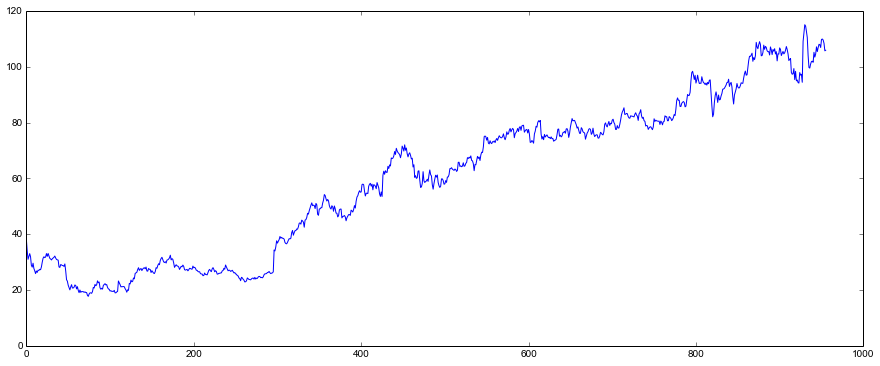

In [14]:
plt.plot(ts)

### Function for testing stationarity

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

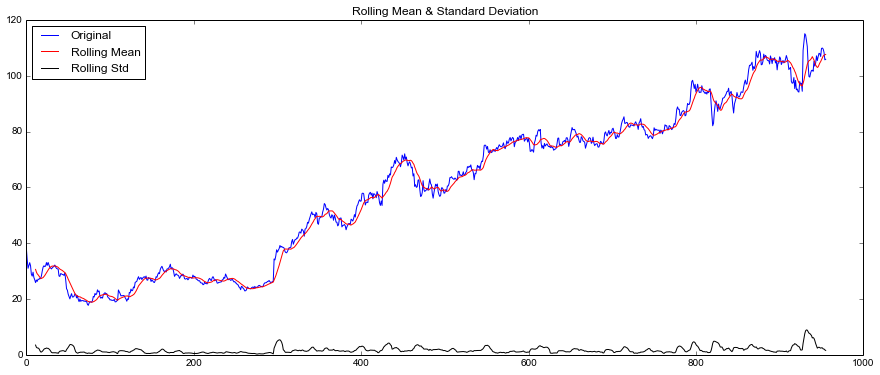

Results of Dickey-Fuller Test:
Test Statistic                  -0.026673
p-value                          0.956270
#Lags Used                       6.000000
Number of Observations Used    949.000000
Critical Value (5%)             -2.864590
Critical Value (1%)             -3.437259
Critical Value (10%)            -2.568394
dtype: float64


In [16]:
test_stationarity(ts)

# Making TS Stationary


## Estimating & Eliminating Trend


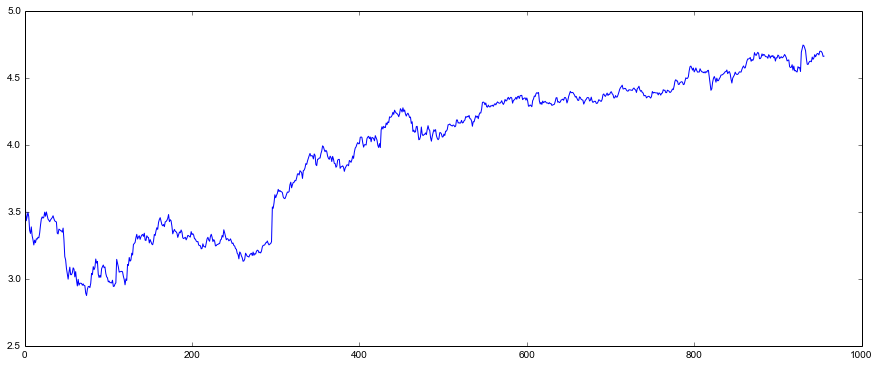

In [17]:
ts_log = np.log(ts)
plt.plot(ts_log)

## Smoothing:

### Moving average

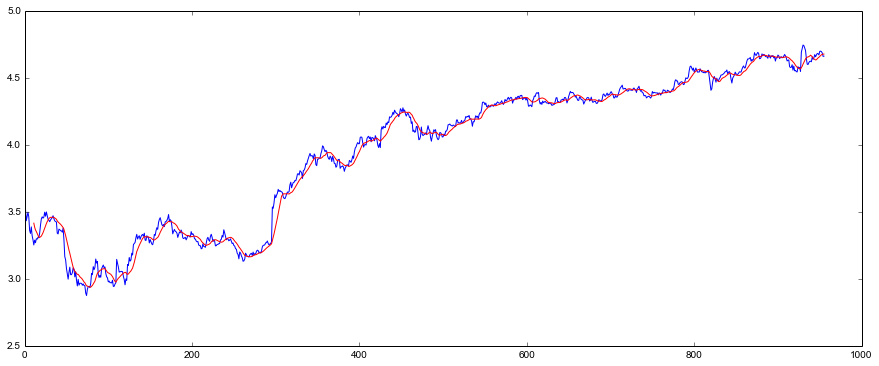

In [18]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [19]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

date
2012-05-18         NaN
2012-05-21         NaN
2012-05-22         NaN
2012-05-23         NaN
2012-05-24         NaN
2012-05-25         NaN
2012-05-29         NaN
2012-05-30         NaN
2012-05-31         NaN
2012-06-01         NaN
2012-06-04         NaN
2012-06-05   -0.162482
dtype: float64

In [20]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2012-06-05   -0.162482
2012-06-06   -0.097221
2012-06-07   -0.094605
2012-06-08   -0.053816
2012-06-11   -0.043015
dtype: float64

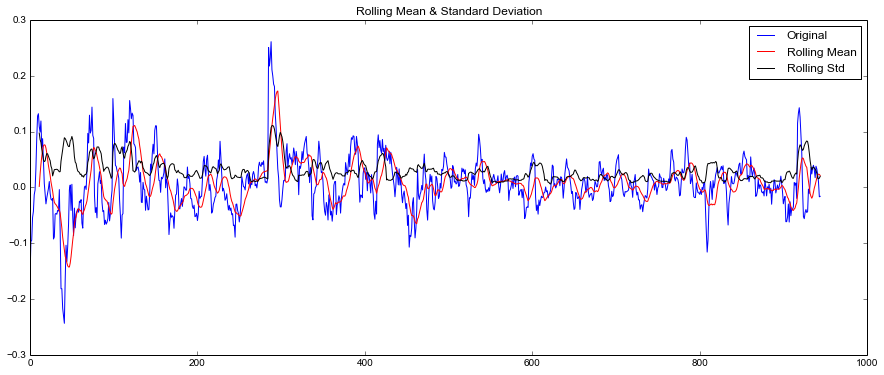

Results of Dickey-Fuller Test:
Test Statistic                -9.059082e+00
p-value                        4.615366e-15
#Lags Used                     5.000000e+00
Number of Observations Used    9.390000e+02
Critical Value (5%)           -2.864623e+00
Critical Value (1%)           -3.437333e+00
Critical Value (10%)          -2.568412e+00
dtype: float64


In [21]:
test_stationarity(ts_log_moving_avg_diff)

### Exponentially Weighted Moving Average

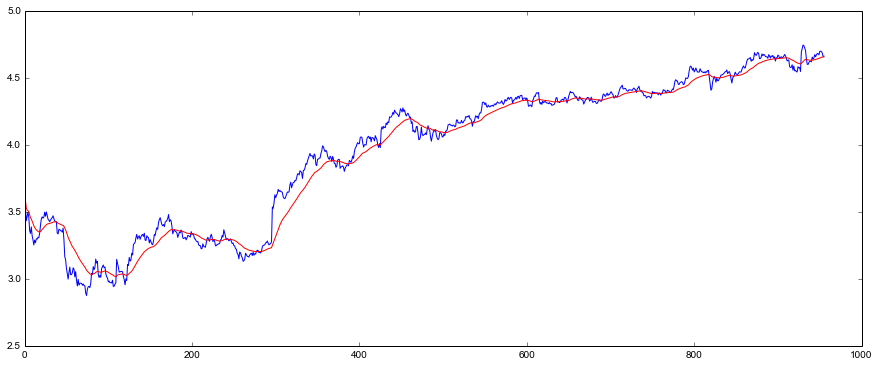

In [22]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

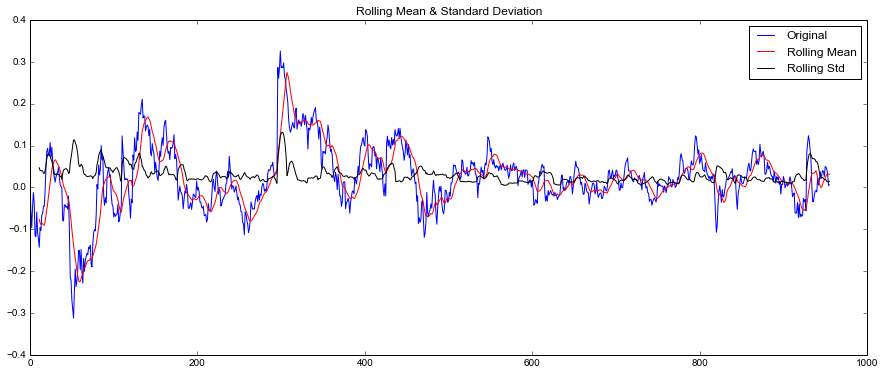

Results of Dickey-Fuller Test:
Test Statistic                  -5.193435
p-value                          0.000009
#Lags Used                       0.000000
Number of Observations Used    955.000000
Critical Value (5%)             -2.864571
Critical Value (1%)             -3.437216
Critical Value (10%)            -2.568384
dtype: float64


In [23]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality

### Differencing:

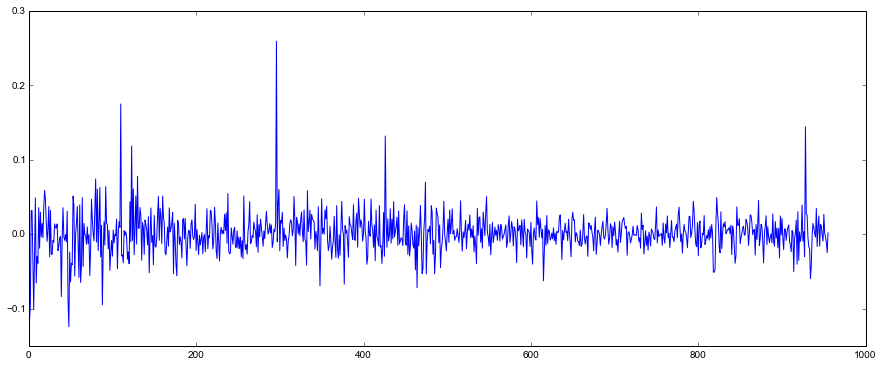

In [24]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

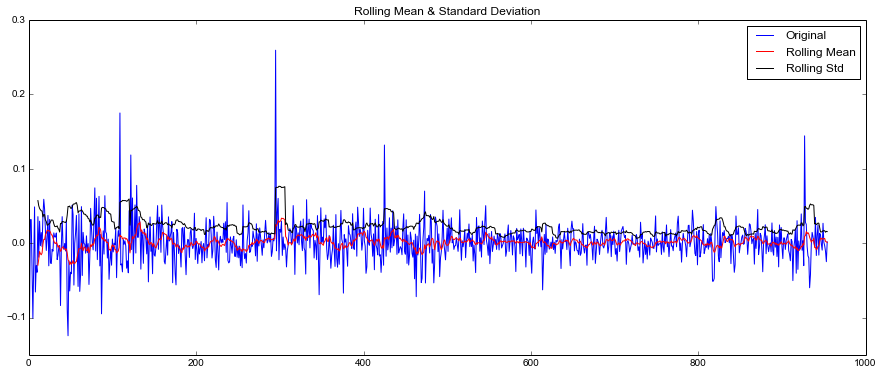

Results of Dickey-Fuller Test:
Test Statistic                 -30.458521
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    954.000000
Critical Value (5%)             -2.864574
Critical Value (1%)             -3.437223
Critical Value (10%)            -2.568386
dtype: float64


In [25]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposition:

In [31]:
from statsmodels.api.tsa import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ImportError: No module named tsa

In [30]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

NameError: name 'residual' is not defined

# Final Forecasting

In [31]:
from statsmodels.tsa.arima_model import ARIMA

### ACF & PACF Plots

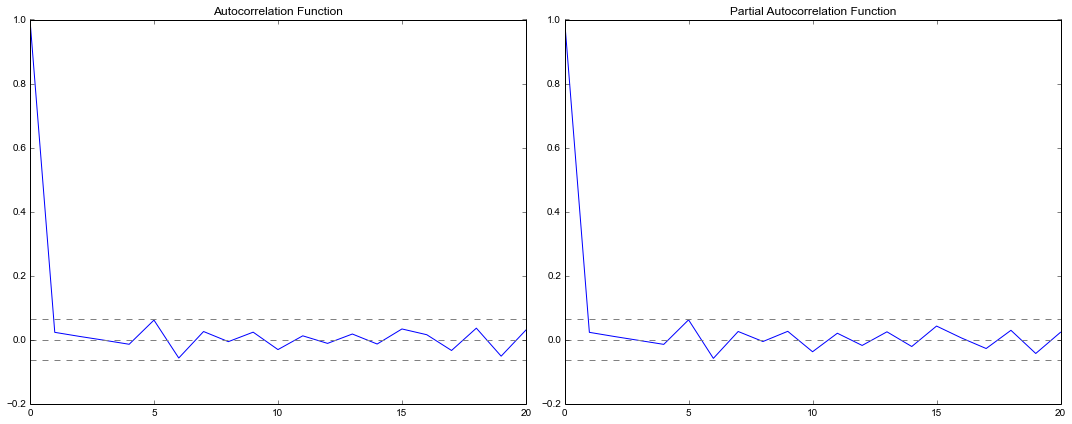

In [32]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### AR Model:

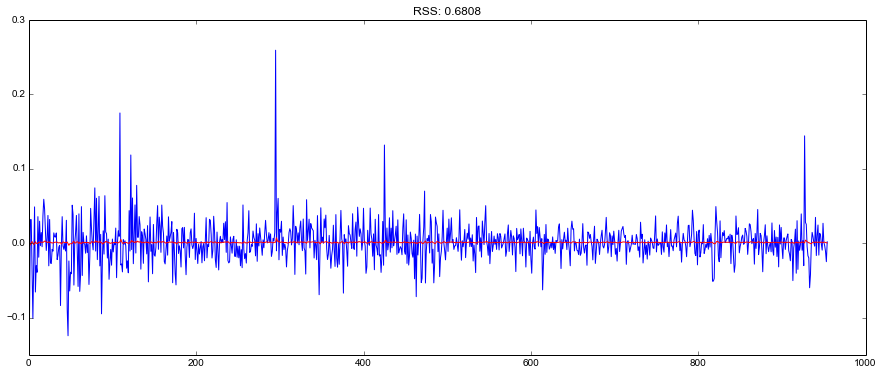

In [33]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

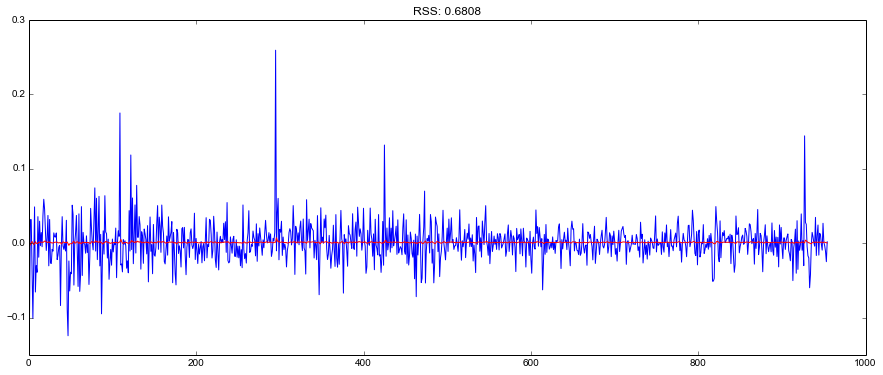

In [34]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model:

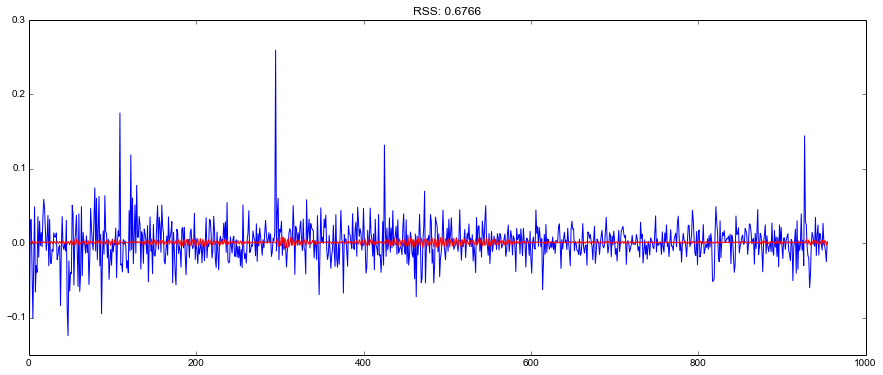

In [35]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Convert to original scale:

In [36]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

date
2012-05-21    0.001067
2012-05-22    0.001249
2012-05-23   -0.000572
2012-05-24    0.000660
2012-05-25    0.003354
dtype: float64


In [37]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

date
2012-05-21    0.001067
2012-05-22    0.002316
2012-05-23    0.001745
2012-05-24    0.002405
2012-05-25    0.005759
dtype: float64


In [38]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2012-05-18    3.643621
2012-05-21    3.644688
2012-05-22    3.645937
2012-05-23    3.645365
2012-05-24    3.646026
dtype: float64

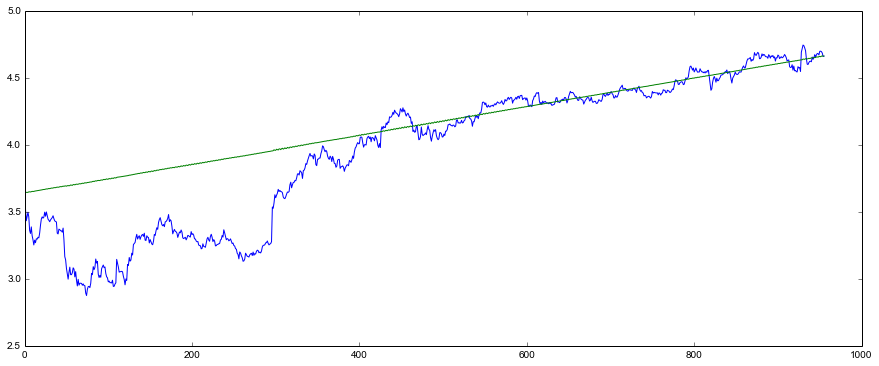

In [39]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

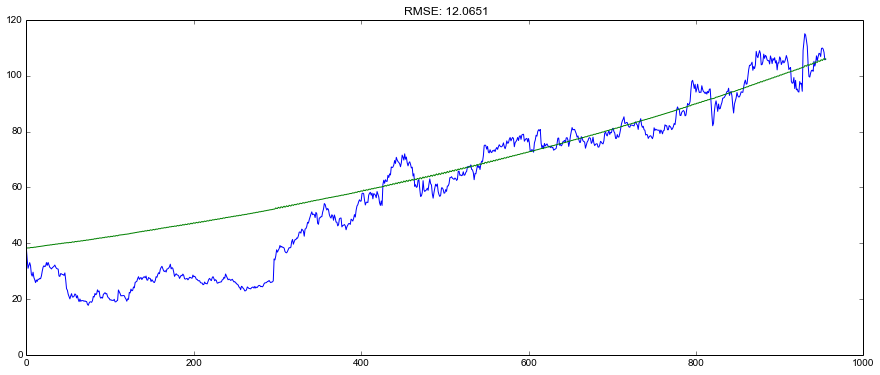

In [40]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))